In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [11]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [12]:
#convert our data frames into numpyarrays to make them easier to work with
features = df.drop('variety', axis=1).to_numpy()
labels = df['variety'].to_numpy()
#If you want your output to match mine select a random_state of 41
#Test size of 0.2 means 20% of our dataset will be used for testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels,
test_size=0.2, random_state=41)

In [13]:
def find_distance(Train_features, Target_features) :
    distance = np.sqrt(np.sum((Train_features - Target_features) ** 2))
    return distance

In [14]:
def find_k_nearest(features_train,labels_train,target_feature,k) :
    distances = [] 
    for i in range(len(features_train)):
        distance = find_distance(features_train[i], target_feature)
        distances.append((distance, labels_train[i]))
    return sorted(distances)[:k]



In [15]:
def predict_label(features_train, labels_train, target_feature, k):
    # Find the k-nearest neighbors
    nearest_neighbors = find_k_nearest(features_train, labels_train, target_feature, k)
    # Extract only the labels of these neighbors
    neighbor_labels = [label for _, label in nearest_neighbors]
    # Determine the most common label among the neighbors
    most_common_label = max(set(neighbor_labels), key=neighbor_labels.count)
    
    return most_common_label

0.9
0.9333333333333333
0.9333333333333333
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9333333333333333
0.9666666666666667
0.9333333333333333
0.9333333333333333
0.9
0.9
0.9
0.9
0.9


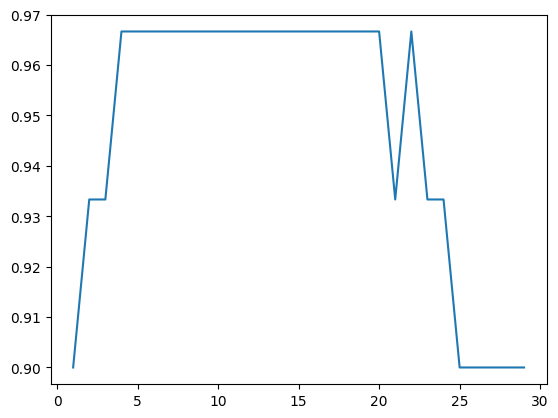

In [16]:
# Initialize a list to store accuracy values for different k's
accuracies = []
# Loop over k from 1 to 29
for k in range(1, 30):
    correct = 0  # Initialize a counter for correct predictions
    # Loop over all test samples
    for i in range(len(features_test)):
        # Predict the label for the ith test feature
        if predict_label(features_train, labels_train, features_test[i], k) == labels_test[i]:
            correct += 1  # Increment correct count if prediction is accurate
    # Calculate the accuracy as the ratio of correct predictions to total predictions
    accuracy = correct / len(features_test)
    print(accuracy)  # Print the accuracy for this k
    accuracies.append(accuracy)  # Store the accuracy for this k
# Plot the accuracies for each k value
plt.plot(range(1, k+1), accuracies)




In [17]:
len(features_train)

120

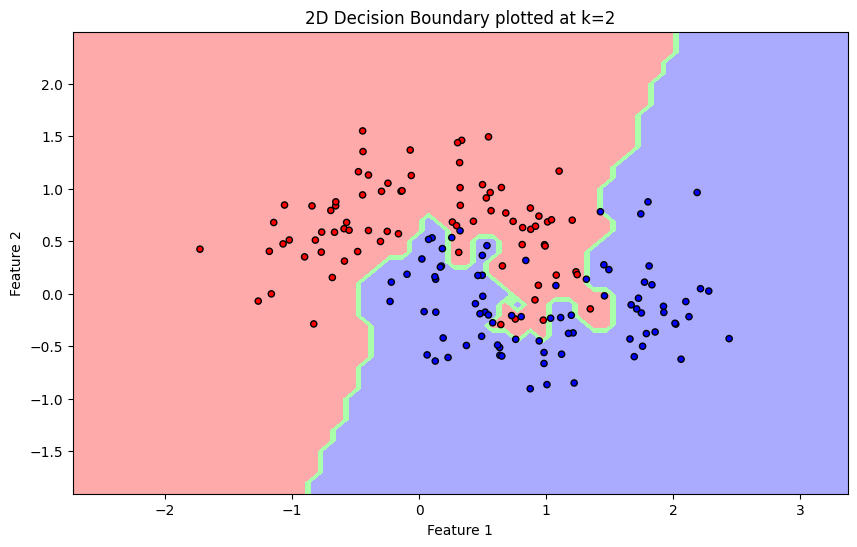

In [36]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generating synthetic dataset
X, y = make_moons(n_samples=200, noise=0.3, random_state=42)

# Splitting dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, predict_label, k):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict class using data within the meshgrid
    Z = np.c_[xx.ravel(), yy.ravel()]
    pred_labels = [predict_label(features_train, labels_train, feature, k) for feature in Z]
    Z = np.array(pred_labels).reshape(xx.shape)

    # Define color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"2D Decision Boundary plotted at k={k}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example usage of the function
plot_decision_boundary(features_train, labels_train, predict_label, k=2)
